In [168]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rc("font", family = "Malgun Gothic")
matplotlib.rc("axes", unicode_minus = False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 5000
pd.options.display.max_rows = 1000

### 데이터

- 9/20~10/3 2주간 비효율 리스트에 들어간 상품 수 255개

In [169]:
train = pd.read_excel("Downloads/WBR_211007.xlsx", header = 0, sheet_name = "합계")
train.head(2)

,id,sku코드,대 카테고리,중 카테고리,보관방법,분류타입,sku명,판매가,구성품,3주차,4주차,합계,분석
0,13808,PO016FS004,디저트·음료,음료,냉동,미관리,[미쁘동] 로스운송운영 결제용 SKU,1000000,본품,1,0,1,허수
1,13525,PF018RD011,간편식·밀키트,찜·구이·볶음,당일입고,관리,킹크랩찜 3.5kg,419000,본품,1,0,1,고가품


### 문제파악 - 분석

- a. 수요가 없는 카테고리 - 디저트, 음료, 베이커리 카테고리 상품은 낮배송을 위해 기획되었지만 기존 고객이 원하는 것이 아니라고 생각한다.
- b. 공급불가 - 공급불가 상태로 판매 불가능하지만 상품 구색(Ex: 다양한 성게알)을 위해 오픈해두었다.
- c. 시즌 아웃 - 시즌 수요가 지나 판매가 저조해진 상품이지만 구색을 위해 오픈해두었거나(b와 동일) 담당자 실수로 오픈해두었다.
- d. 고가품 - 비효율 판단 기준이 배송 건수이다보니 고가품이 필터링 된다.
- e. 냉동 식재료 - 장을 보려는 목적의 고객이 적다. (가격경쟁력 약하지 않음)

#### 1) 공급불가

In [170]:
공급불가_list = train[train["분석"] == "공급불가"]

공급불가_list.head()

,id,sku코드,대 카테고리,중 카테고리,보관방법,분류타입,sku명,판매가,구성품,3주차,4주차,합계,분석
16,13844,PO018RS002,성게알·알,성게알,냉장,미관리,바라즈메 말똥성게알,59900,본품,0,0,0,공급불가
24,13620,PM009RS14,성게알·알,성게알,냉장,미관리,[동해] 목곽 성게알 150g,49000,본품,0,0,0,공급불가
25,13653,PM009RS17,성게알·알,성게알,냉장,미관리,마루키 성게알,45900,본품,0,0,0,공급불가
29,10619,PM073RS003,성게알·알,기타 생선알,냉장,미관리,캐비어 오세트라 세트,39900,본품,0,0,0,공급불가
30,11140,PE008RS1,소스·기타가공품,소스류,냉장,미관리,시즈오카산 생 와사비 뿌리,39900,본품,0,0,0,공급불가


**[결론]**

**- 225개 상품 중 '공급불가'로 판단되는 상품 수량은 총 40개**

**- 이 부분은 "다양한 상품이 있다는 것을 커머스 소구점으로 가져가고 싶다"는 의견에 따라 기존전략을 그대로 진행하고, 별도 측정을 진행하기로 함**

**- 관련 데이터를 제외한 나머지 부분 측정**

In [171]:
train_fix = train[~(train["분석"] == "공급불가")]

#### 2) 대 카테고리 분석

<Figure size 1296x432 with 0 Axes>

<AxesSubplot:xlabel='대 카테고리', ylabel='count'>

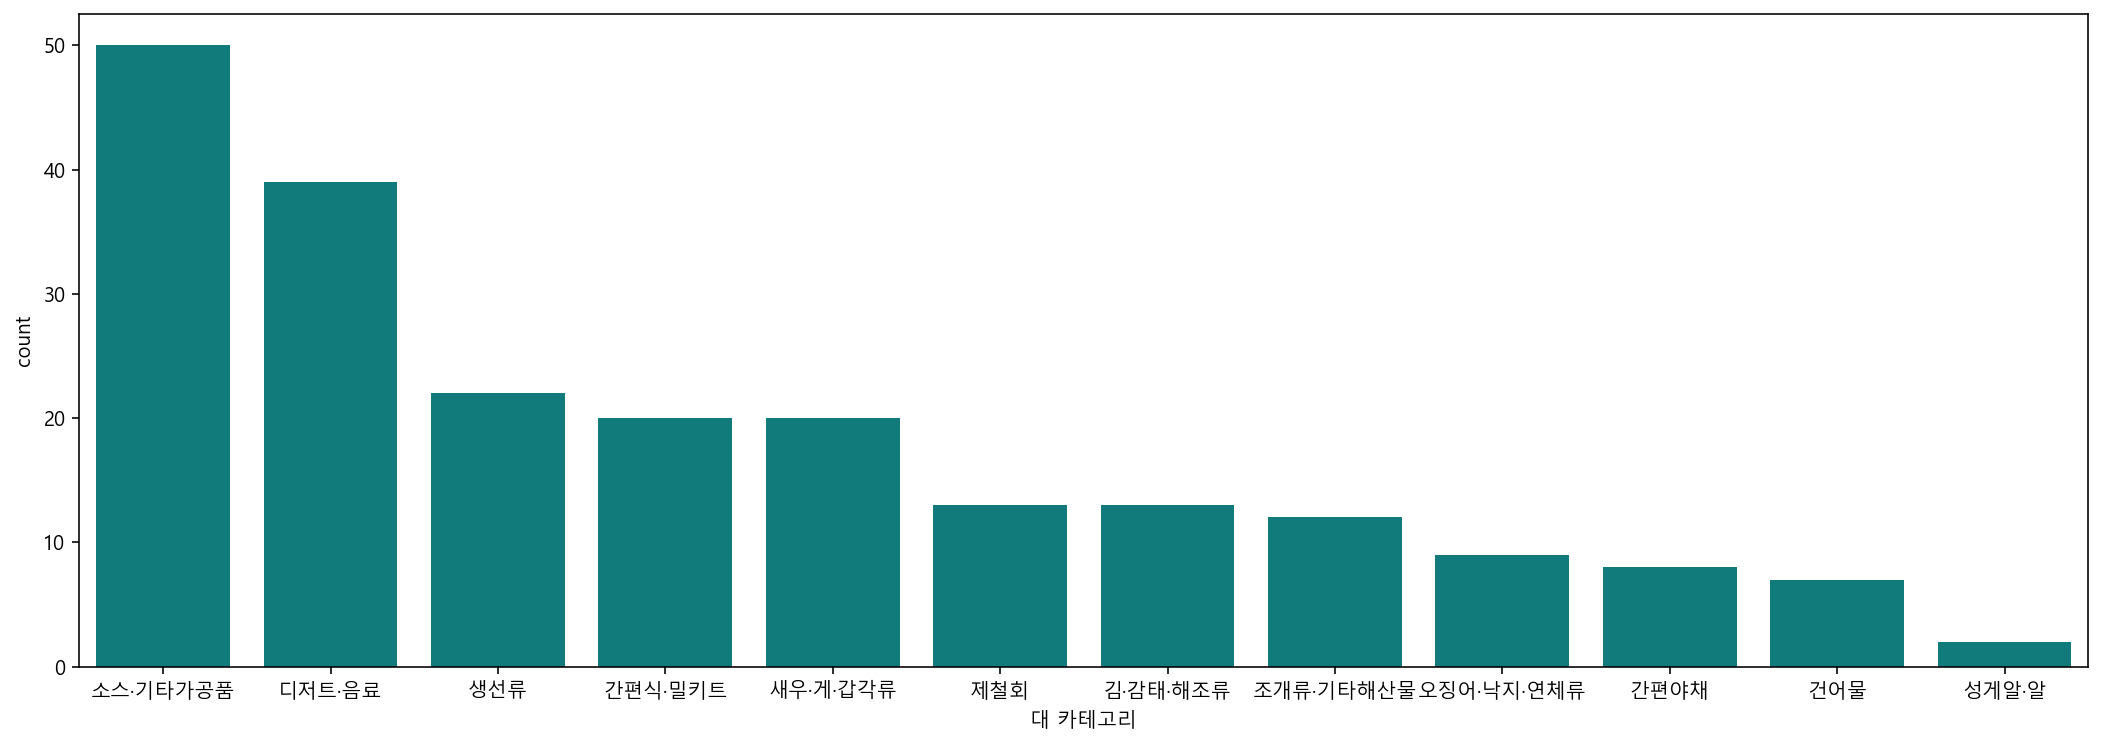

In [172]:
order = pd.DataFrame(train_fix["대 카테고리"].value_counts()).reset_index()["index"]

plt.figure(figsize = [18,6])
sns.countplot(x = "대 카테고리", data = train_fix, color = "darkcyan", order = order)

#### 2) 보관방법 분석

<Figure size 504x360 with 0 Axes>

<AxesSubplot:xlabel='보관방법', ylabel='count'>

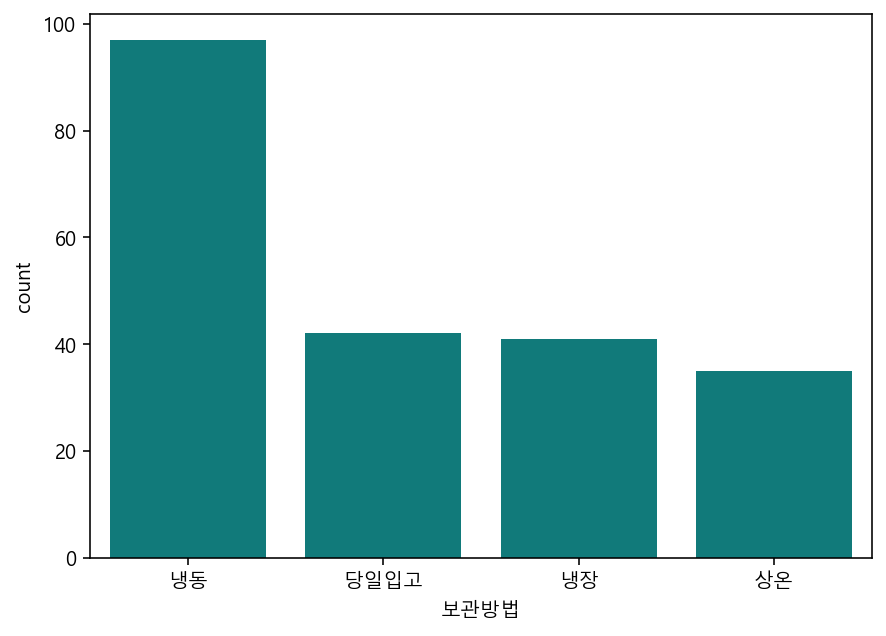

In [173]:
order = pd.DataFrame(train_fix["보관방법"].value_counts()).reset_index()["index"]

plt.figure(figsize = [7,5])
sns.countplot(x = "보관방법", data = train_fix, color = "darkcyan", order = order)

**[결론]**

**- 소스·기타가공품 / 디저트음료가 비효율상품 비중이 가장 높다**

**- 냉동상품의 비효율상품 비중이 가장 높다**

**- 위 두개가 겹치는 부분들 비중 줄이는 작업 진행 요청**

#### 3-1) 소스·기타가공품

In [174]:
소스·기타가공품 = train_fix[train_fix["대 카테고리"] == "소스·기타가공품"]
소스·기타가공품 = 소스·기타가공품.sort_values(by = ["판매가","합계"], ascending = True)

#### 소스·기타가공품 중 냉동상품(오름차순)

In [175]:
소스·기타가공품[소스·기타가공품["보관방법"] == "냉동"].sort_values(by = "합계", ascending = True)

,id,sku코드,대 카테고리,중 카테고리,보관방법,분류타입,sku명,판매가,구성품,3주차,4주차,합계,분석
240,13069,PM103FS2,소스·기타가공품,가공품,냉동,미관리,연어 품은 단백질바,2000,본품,0,0,0,NaN
155,11169,PM103FS5,소스·기타가공품,가공품,냉동,미관리,치즈폭탄조개,7900,본품,0,0,0,NaN
187,12816,HIQY8FS4,소스·기타가공품,가공품,냉동,미관리,어만두,5900,본품,0,0,0,NaN
203,11193,PF038FS4,소스·기타가공품,가공품,냉동,미관리,감자새우말이 10pcs,4900,본품,0,0,0,NaN
186,12815,HIQY8FS3,소스·기타가공품,가공품,냉동,미관리,순새우 만두,5900,본품,0,1,1,NaN
172,11880,PM055FS3,소스·기타가공품,절임류,냉동,미관리,블럭 명란젓,6900,본품,0,1,1,NaN
227,12699,PM095FS2,소스·기타가공품,절임류,냉동,미관리,호오호오 참치날치알마요 비빔장,3700,본품,0,2,2,NaN
208,12752,LlYHZFS2,소스·기타가공품,가공품,냉동,미관리,황태죽,4100,본품,2,0,2,NaN
207,12753,LlYHZFS3,소스·기타가공품,가공품,냉동,미관리,삼선짬뽕죽,4700,본품,0,2,2,NaN
237,12877,PM074FS11,소스·기타가공품,곁들임,냉동,미관리,해물 오코노미야끼 260g,2200,본품,0,2,2,NaN


#### 소스, 기타가공품 - 10000원 이상

In [176]:
소스·기타가공품[(소스·기타가공품["판매가"] > 10000)]

,id,sku코드,대 카테고리,중 카테고리,보관방법,분류타입,sku명,판매가,구성품,3주차,4주차,합계,분석
123,13085,PM104RS2,소스·기타가공품,소스류,상온,미관리,[신안] 트러플 천일염 15스틱,11900,본품,1,0,1,NaN
109,12766,Ey8edRS3,소스·기타가공품,절임류,냉장,미관리,[게방식당] 새우장,13000,본품,0,0,0,NaN
107,10882,PE009NS2,소스·기타가공품,소스류,상온,미관리,[크로아티아] 트러플 오일 (엑스트라 버진),13900,본품,2,0,2,NaN
96,10881,PE009NS1,소스·기타가공품,소스류,상온,미관리,[크로아티아] 지간테 트러플 소금,14900,본품,0,0,0,NaN
97,13689,PM030RS4,소스·기타가공품,절임류,냉장,미관리,[안소베스 데 레스카라] 화이트 앤초비,14900,본품,1,1,2,NaN
91,13238,PE009NS3,소스·기타가공품,소스류,상온,미관리,[크로아티아] 지간테 트러플 마요 디핑소스,15500,본품,1,0,1,NaN
84,12767,Ey8edRS4,소스·기타가공품,절임류,냉장,미관리,[게방식당] 전복장,17000,본품,0,0,0,NaN
81,13073,PM104RS1,소스·기타가공품,소스류,냉장,미관리,[신안] 트러플 소금 (그라인더포함),17900,본품,0,1,1,NaN
82,13082,PM078FS3,소스·기타가공품,절임류,냉동,미관리,호오호오 복분자 양념게장,17900,본품,2,0,2,NaN
79,12768,Ey8edRS5,소스·기타가공품,절임류,냉장,미관리,[게방식당] 연어장,18000,본품,0,0,0,NaN


#### 3-2) 디저트·음료

In [177]:
디저트·음료 = train_fix[train_fix["대 카테고리"] == "디저트·음료"]
디저트·음료 = 디저트·음료.sort_values(by = ["판매가","합계"], ascending = True)

#### 디저트·음료 중 냉동상품(오름차순)

In [178]:
디저트·음료[디저트·음료["보관방법"] == "냉동"].sort_values(by = "합계", ascending = True)

,id,sku코드,대 카테고리,중 카테고리,보관방법,분류타입,sku명,판매가,구성품,3주차,4주차,합계,분석
78,12763,2t1GjFS15,디저트·음료,베이커리,냉동,미관리,[달롤] 교토마차롤 홀사이즈,18500,본품,0,0,0,NaN
224,12509,2t1GjFS3,디저트·음료,베이커리,냉동,미관리,[루프트] 흑임자 다쿠아즈,3800,본품,0,0,0,NaN
225,12508,2t1GjFS2,디저트·음료,베이커리,냉동,미관리,[루프트] 카라멜 모카 다쿠아즈,3800,본품,0,0,0,NaN
226,12510,2t1GjFS4,디저트·음료,베이커리,냉동,미관리,[루프트] 말차 다쿠아즈,3800,본품,0,0,0,NaN
75,12762,2t1GjFS13,디저트·음료,베이커리,냉동,미관리,[달롤] 흑임자롤 홀사이즈,19000,본품,0,0,0,NaN
122,13699,YLRV3FS1,디저트·음료,기타 디저트,냉동,미관리,국내산 팥콜릿 9구,12000,본품,0,0,0,NaN
150,12796,jewaUFS2,디저트·음료,기타 디저트,냉동,미관리,[라라스윗] 딸기,7900,본품,0,0,0,NaN
0,13808,PO016FS004,디저트·음료,음료,냉동,미관리,[미쁘동] 로스운송운영 결제용 SKU,1000000,본품,1,0,1,허수
235,13390,5qYkDFS5,디저트·음료,베이커리,냉동,미관리,대만 한라봉 샌드위치,2300,본품,0,1,1,NaN
223,12507,2t1GjFS1,디저트·음료,베이커리,냉동,미관리,[루프트] 레몬 요거트 다쿠아즈,3800,본품,1,0,1,NaN


### 결론


- 1) 공급불가 but 가시성을 위한 상품들 비효율상품에서 제외 후 재산정 요청
- 2) '비효율상품/Live 상품수' 목표 : 20% 이하
- 3) 소스 & 디저트 부분 정리 요청 : 차주 WBR에 다시 재요청 예정(어떤 상품이 줄어들었고 향후 어떤 상품을 줄일건지) 
- 4) 계장, 다쿠아즈 이외에 추가적인 부분 발견시 공유 요청

In [181]:
! jupyter nbconvert '비효율상품_Live상품수'조정.ipynb --to=html --no-input

[NbConvertApp] Converting notebook '비효율상품_Live상품수'조정.ipynb to html
[NbConvertApp] Writing 651321 bytes to '비효율상품_Live상품수'조정.html
